In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Q1. Do smokers have higher insurance charges than non-smokers?

In [3]:
df = pd.read_csv('./Data/insurance - insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [5]:
# split into two groups
smokers_df = df.loc[df['smoker']== 'yes']
no_smokers_df = df.loc[df['smoker']== 'no']

In [6]:
# define variable 'charges' for each group
smokers_charges = smokers_df['charges']
nonsmokers_charges = no_smokers_df['charges']

#### Hypothesis:
* H0 (Null Hypothesis): Smokers and non-smokers have the same insurance charges
* H1 (Alternative Hypothesis): Smokers and non-smokers have significantly different insurance charges
* Alpha : 0.05

#### Select Test
* Data: Numeric
* Samples/groups: 2 (smokers and nonsmokers)
* Test: 2 Sample T-Test (Independent T-Test)

#### Test Assumptions
1. No significant outliers
2. Normality
3. Equal variance


In [8]:
# testing for outliers
# smokers
smokers_zscores = stats.zscore(smokers_charges)
smokers_outliers = abs(smokers_zscores)>3
np.sum(smokers_outliers)

0

In [10]:
# non smokers
non_smokers_zscore = stats.zscore(nonsmokers_charges)
non_smokers_ouliers = abs(non_smokers_zscore)>3
np.sum(non_smokers_ouliers)

24

In [11]:
# remove outliers from the non smoker group
nonsmokers_charges = nonsmokers_charges[(np.abs(stats.zscore(nonsmokers_charges)) < 3)]

In [12]:
# check for normality smoker group
result_smoker_group = stats.normaltest(smokers_charges)
result_smoker_group

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [13]:
result_no_smoker_group = stats.normaltest(nonsmokers_charges)
result_no_smoker_group

NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)

Our p-values for both groups are well below 0.05, which means our data is NOT normally distributed.

In [14]:
# Check for Equal Variance
result_levene = stats.levene(smokers_charges, nonsmokers_charges)
result_levene

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)

Looks like we don't have equal variances. We just need to be sure to include "equal_var = False" when we perform our t-test.

In [15]:
# Perform and evaluate the t-test
result_ttest = stats.ttest_ind(smokers_charges, nonsmokers_charges, equal_var=False)
result_ttest

Ttest_indResult(statistic=33.732305987092516, pvalue=2.5753226625873578e-104)

Our p-value < alpha (0.05), so we reject the null hypothesis and accept that there is a significant difference between the charges for smokers and non smokers

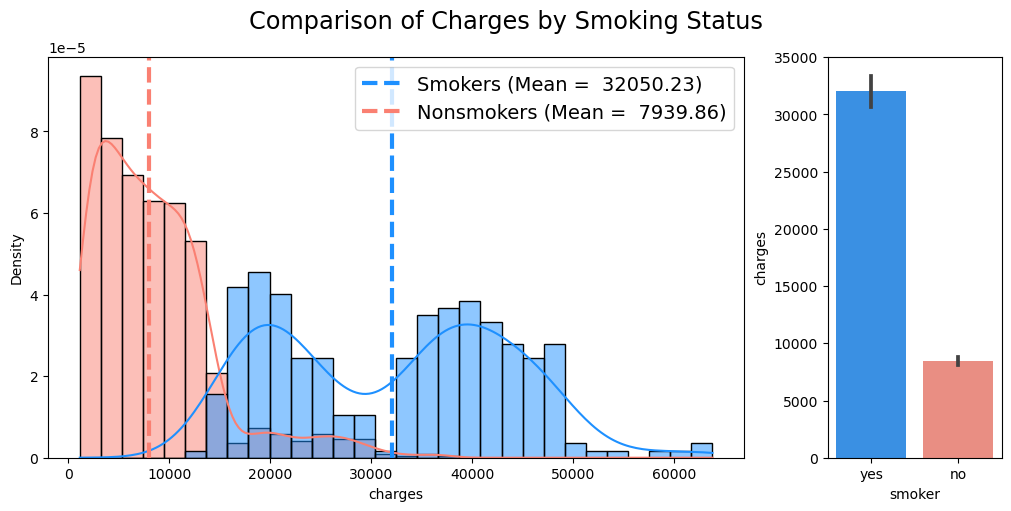

In [16]:
# specify colors
groups_palette={'yes': 'dodgerblue', 
                "no": 'salmon'}

# visualize means
fig, (ax, ax_bar) = plt.subplots(figsize = (10, 5), 
                                 ncols = 2, 
                                 constrained_layout = True,
                                 gridspec_kw = {'width_ratios': [0.8, 0.2]})

# histogram
ax = sns.histplot(data = df, 
                  x = 'charges', 
                  fill = True, 
                  hue = 'smoker', 
                  kde = True, 
                  stat = 'density', 
                  common_norm = False,
                  ax = ax, 
                  palette = groups_palette)

ax.axvline(np.mean(smokers_charges), 
           ls = '--',
           lw = 3, 
           label = f"Smokers (Mean = {np.mean(smokers_charges): .2f})",
           color = groups_palette['yes'])

ax.axvline(np.mean(nonsmokers_charges), 
           ls = '--', 
           lw = 3, 
           label = f"Nonsmokers (Mean = {np.mean(nonsmokers_charges): .2f})",
           color = groups_palette['no'])

ax.legend(prop = {"size": 14}, 
          loc = 'upper right') #bbox_to_anchor=[1,1])

# barplot
sns.barplot(data = df, 
            x = 'smoker', 
            y = 'charges',
            ax = ax_bar,
            palette = groups_palette)

fig.suptitle('Comparison of Charges by Smoking Status',
             fontsize = 'xx-large');

### Q2. Are men more likely to smoke than women?

#### Hypothesis:
* H0 (Null Hypothesis): Men and women are equally likely to smoke.
* H1 (Alternative Hypothesis): Men and women differ in their likeliness to smoke.
* Alpha : 0.05

#### Select Test
* Data: Cetgorical
* Samples/groups: 2 (men and women)
* Chi-Square

#### Test Assumptions
1. Two categorical variables (ordinal or nominal)
2. Outcomes are independent
Our two categorical variables, men and women, are nominal.

Our outcomes are independent (men's likeliness to smoke is not influenced by women's likeliness to smoke and vice versa).


In [22]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [18]:
# get contingency table for chi-squared test input
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [19]:
# run chi-squared test
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result

# print p-value
print(p)

0.006548143503580696


Our p-value is less than our designated alpha (0.05), so we will reject the null hypothesis that men and women are equally likely to smoke.

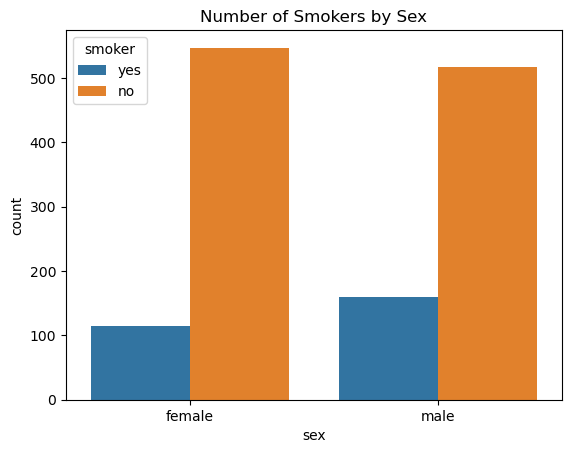

In [20]:
# lets plot smokers by gender
ax = sns.countplot(data = df, x = 'sex', hue = 'smoker')
ax.set_title("Number of Smokers by Sex");

### Q3. Do different regions have different charges, on average?

#### Hypothesis:
* H0 (Null Hypothesis): Different regions have the same charges on average.
* H1 (Alternative Hypothesis): Different regions have significantly different charges on average.
* Alpha : 0.05

#### Select Test
* Data: Numeric
* Samples/groups: 4 (regions; see below)
Test: One-way ANOVA and/or Tukey


In [21]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [23]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [24]:
# prepare regions into a dictionary
groups = {}

# loop through regions
for region in df['region'].unique():
    
    # grab charges for that region
    data = df.loc[df['region'] == region, 'charges'].copy()
    
    # add to dictionary
    groups[region] = data
    
# check
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [25]:
# check each group for normality
# create dictionary to save results
norm_results = {}

# iterate through groups dictionary
for region, data in groups.items():
    
    # get the test stat and p-value from doing a normality test
    stat, p = stats.normaltest(data)
    
    # save to dictionary; include the size of the group
    norm_results[region] = {'n': len(data),
                           'p': p,
                           'test stat': stat}
    
# convert to df
norm_results_df = pd.DataFrame(norm_results).T

# add column to show if p-value < 0.05
norm_results_df['sig'] = norm_results_df['p'] < 0.05

# show
norm_results_df

,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


All regions' p-values are below our chosen alpha of 0.05, so we can reject the null hypothesis of the normality test that the sample comes from a normal distribution. Therefore, we consider the charges to be NOT normally distributed.

In [26]:
# check for and remove outliers

# iterate through groups
for region, charges in groups.items():
    zscores = stats.zscore(charges)
    outliers = abs(zscores) > 3
    print(f"Outliers for {region}: {np.sum(outliers)}")
    print(charges[(np.abs(stats.zscore(charges)) > 3)].sort_values())
    print()

Outliers for southwest: 8
94      47291.05500
251     47305.30500
1284    47403.88000
328     47928.03000
39      48173.36100
175     48824.45000
34      51194.55914
1146    52590.82939
Name: charges, dtype: float64

Outliers for southeast: 2
1300    62592.87309
543     63770.42801
Name: charges, dtype: float64

Outliers for northwest: 7
569     45702.02235
677     46130.52650
1122    46661.44240
1301    46718.16325
55      47496.49445
819     55135.40209
1230    60021.39897
Name: charges, dtype: float64

Outliers for northeast: 4
288    47896.79135
330    48517.56315
281    48549.17835
577    58571.07448
Name: charges, dtype: float64



In [27]:
# delete outliers
for region, charges in groups.items():
    groups[region] = charges[(np.abs(stats.zscore(charges)) <= 3)]

To check if the outliers were removed, we can see if there are any charges at the lowest amount of outlier charges or above for each region.

In [28]:
# check if outliers were removed
for region, charges in groups.items():
    print(f"{region} max charges: {charges.max()}")

southwest max charges: 46113.511
southeast max charges: 49577.6624
northwest max charges: 43943.8761
northeast max charges: 46255.1125


In [29]:
# check for equal variance
result = stats.levene(*groups.values())
result

LeveneResult(statistic=9.518349004554441, pvalue=3.2035503711783993e-06)

The p-value for our equal variance test is below our chosen alpha value of 0.05, so we will reject the null hypothesis that these groups have equal variances

In [32]:
# one-way ANOVA
result = stats.kruskal(*groups.values())
result

KruskalResult(statistic=6.914045702545643, pvalue=0.07468847911322242)

The p-value from the Kruskal-Wallis test is just above our chosen alpha of 0.05, meaning that we cannot reject the null hypothesis that the regions' charges have no statistically significant difference.

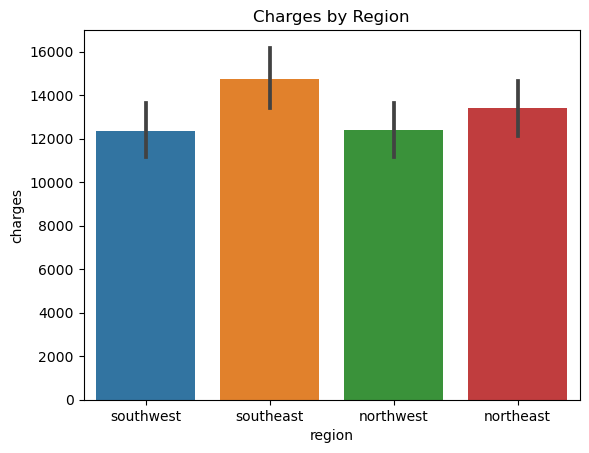

In [33]:
# barplot to compare means (charges) of regions
ax = sns.barplot(data = df, x = 'region', y = 'charges')
ax.set_title('Charges by Region');